Here we analyze the raw data obtained from the _QPC_dd_sim.py_ script.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
import json
import matplotlib

In [2]:
# define basic figure sizes
bwidth=7
bheight=5
base_font = 17

matplotlib.rcParams.update({'font.size': base_font,"legend.fontsize":base_font-4 ,"font.family": "serif", 
                            "font.serif": "CMU Serif, Times New Roman",
                           'text.usetex' : True })

sns.set_palette("colorblind")

In [3]:
def load_data(dir_route, file):
    # loading the simulation data
    with h5py.File(dir_route+file, 'r') as res_h5:
        Param_dict = json.loads(res_h5['metadata/parameters'][()])

        # load qpc data
        N_bond = res_h5["results/QPC_bond_density"][:]
        N_left = res_h5["results/QPC_left_density"][:]
        N_right = res_h5["results/QPC_right_density"][:]
        N_last = res_h5["results/QPC_last_site_density"][:]

        # load dot data
        N_d1 = res_h5["results/d1_density"][:]
        N_d2 = res_h5["results/d2_density"][:]

        # time range
        Times = res_h5["results/time"][:]
        
        # trajectories
        Trajectories = res_h5["results/trajectories"][:]

    res_h5.close()
    
    return Param_dict,Times, N_bond, N_left, N_right, N_last, N_d1, N_d2,Trajectories
    

In [4]:
data_route = "../data/sims/"


# Individual examples

Test with the analytic scattering aplitude

In [5]:
file_name = "res_L13_maxtim10.0_bw0.8_k0.1_jp1.0_t0.1_om0.1_dd0second.hdf5"

param_dict, times, n_bond, n_left, n_right, n_last, n_d1, n_d2, traject = load_data(data_route, file_name)

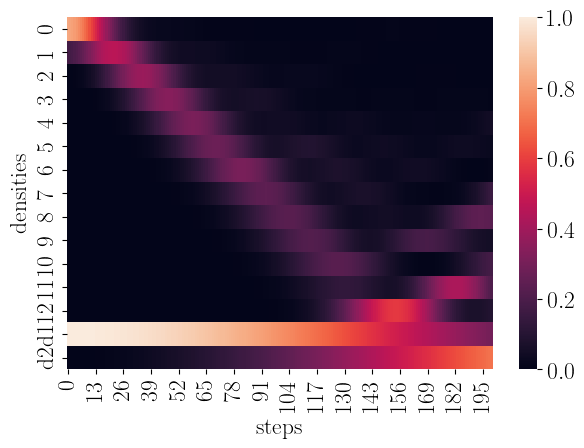

In [6]:
# plot the occupations as a heatmap with lattice site in the y axis and time on the x
ax = sns.heatmap(traject)
ax.set_xlabel("steps")
ax.set_ylabel("densities")

site_ticks = list(range(0,13)) + ["d1","d2"]
tick_pos = np.asarray(range(0,15)) + 0.5

ax.set_yticks(tick_pos,site_ticks);

plt.tight_layout()

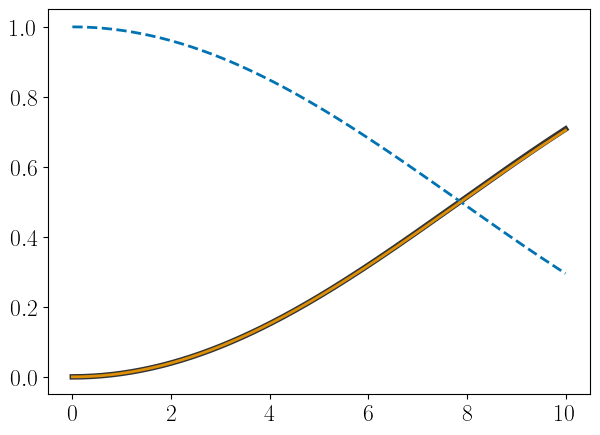

In [7]:
fig, ax = plt.subplots(1,1, figsize=(7,5),sharex=True)
wr = param_dict["t"]
rabi_osc = np.sin(wr*times)**2

# in dot
ax.plot(times, rabi_osc, linewidth=4.0, alpha=0.8, c='black' ,label="d2")
ax.plot(times, n_d1, linewidth=2.0, alpha=1.0, linestyle="dashed" ,label="d2")
ax.plot(times, n_d2, linewidth=2.0, alpha=1.0, label="d1")

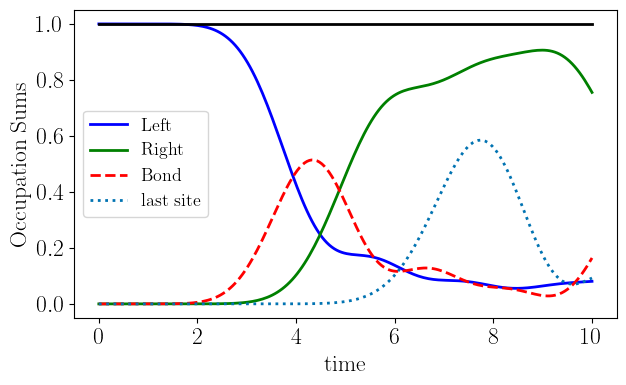

In [8]:
fig, ax = plt.subplots(1,1,figsize=(7,4))

ax.plot(times, n_left, label="Left", c='blue', linewidth=2)
ax.plot(times,n_right,label="Right", c='green',linewidth=2)
ax.plot(times,n_bond,label="Bond", linestyle="dashed", c='red',linewidth=2)
ax.plot(times,n_last,label="last site", linestyle="dotted",linewidth=2)
ax.plot(times,n_left+n_right+n_bond, c = 'black'
        ,linewidth=2)

ax.set_xlabel("time")
ax.set_ylabel("Occupation Sums")
ax.legend()


np.float64(0.9889165002147264)

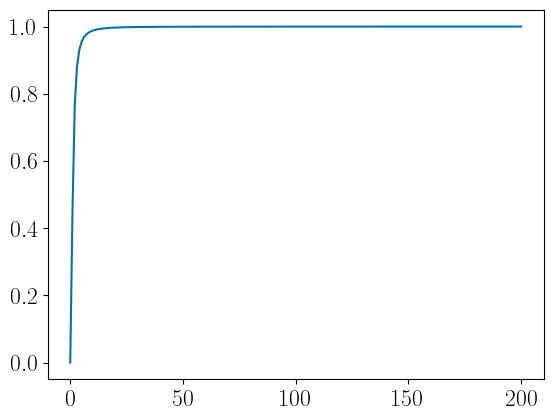

In [9]:
k_arr = np.linspace(0.0001,200,200)

V0 = (1+param_dict['Omega'])
T_k = 1/(1+(V0/k_arr)**2)
plt.plot(k_arr, T_k)
np.sum(T_k)/len(k_arr)


# Constant $t$ , $k$ and variable $\Omega$

here we always look at $\Omega = {0.1, 0.5,1.0 }$


In [14]:
Lqpc = 13
maxtime = 10.0
bw = 0.8
k0 = 0.1
jp = 1.0
t = 2.0
dd_init = "first"
file_list = [
            "res_L{}_maxtim{}_bw{}_k{}_jp{}_t{}_om0.1_dd0{}.hdf5".format(Lqpc,maxtime,bw,k0,jp,t,dd_init), 
            "res_L{}_maxtim{}_bw{}_k{}_jp{}_t{}_om0.5_dd0{}.hdf5".format(Lqpc,maxtime,bw,k0,jp,t,dd_init), 
            "res_L{}_maxtim{}_bw{}_k{}_jp{}_t{}_om1.0_dd0{}.hdf5".format(Lqpc,maxtime,bw,k0,jp,t,dd_init), 
            ]


{'L_qpc': 13, 'max_time': 10.0, 'tsteps': 200, 'bond_index': 6, 'band_width': 0.8, 'g_velocity': 0.1, 'J_prime': 1.0, 't': 2.0, 'Omega': 0.1}
{'L_qpc': 13, 'max_time': 10.0, 'tsteps': 200, 'bond_index': 6, 'band_width': 0.8, 'g_velocity': 0.1, 'J_prime': 1.0, 't': 2.0, 'Omega': 0.5}
{'L_qpc': 13, 'max_time': 10.0, 'tsteps': 200, 'bond_index': 6, 'band_width': 0.8, 'g_velocity': 0.1, 'J_prime': 1.0, 't': 2.0, 'Omega': 1.0}


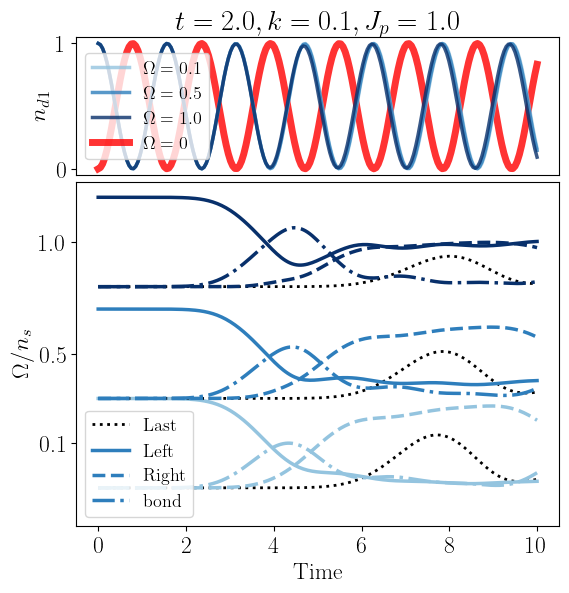

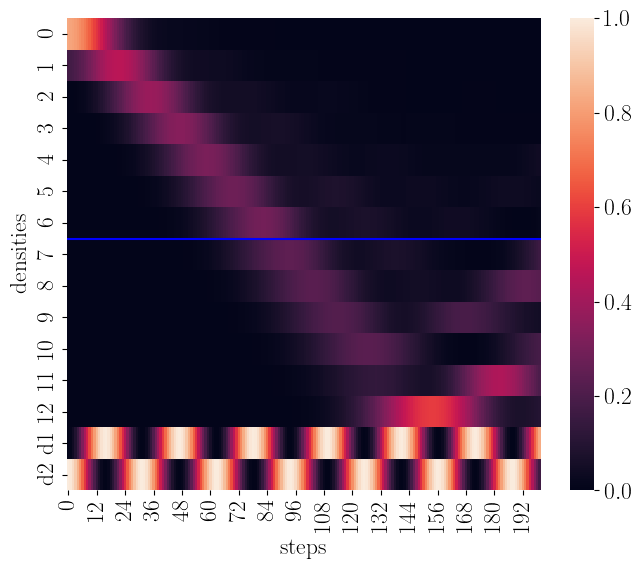

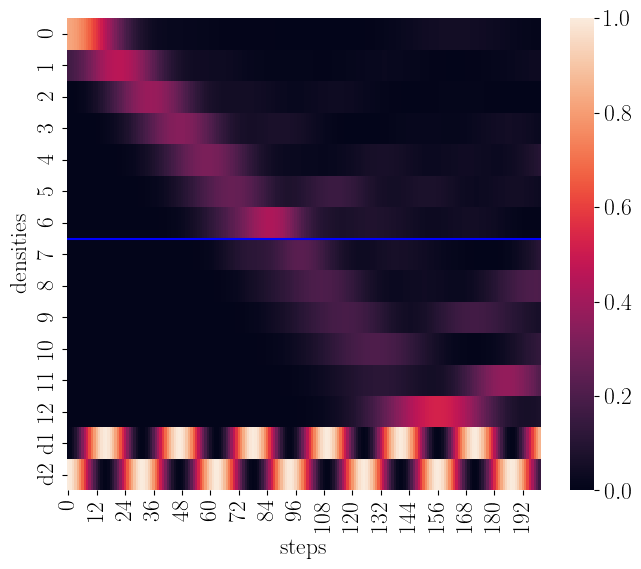

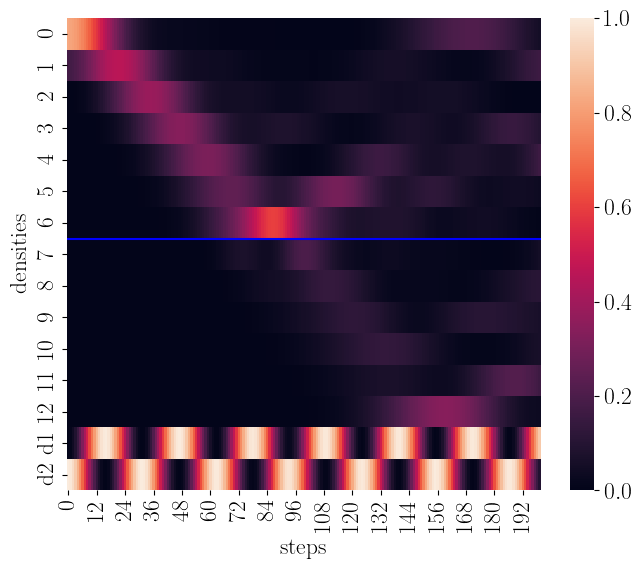

In [15]:
colors = plt.cm.Blues(np.linspace(0.4,1,len(file_list)))

tick_positions = []
omega_labels = []

fig, axd = plt.subplots(2,1,figsize=(6,7),sharex=True)

for f in range(0,len(file_list)):
    file_ = file_list[f]
    # for the double dots
    param_dict, times, n_bond, n_left, n_right, n_last, n_d1, n_d2, traject = load_data(data_route, file_)
    Om = param_dict["Omega"]
    
    print(param_dict)
    
    axd[0].plot(times, n_d2, c = colors[f], alpha=0.8 ,linewidth=2.5, 
                label=r'$\Omega={}$'.format(param_dict["Omega"]))    
    
    axd[1].plot(times,n_last+(2.5*Om), linestyle="dotted",linewidth=2,c='black')
    axd[1].plot(times, n_left+(2.5*Om), c = colors[f], alpha=1.0 ,linewidth=2.5,)
    axd[1].plot(times, n_right+(2.5*Om), c = colors[f], alpha=1.0 ,linewidth=2.5,linestyle="dashed")
    axd[1].plot(times, n_bond+(2.5*Om), c = colors[f], alpha=1.0 ,linewidth=2.5,linestyle="dashdot")

    tick_positions.append(2.5*Om+0.5)
    omega_labels.append(Om)  
    
    # for the trajectories ----------------
    fig_traj, ax_traj = plt.subplots(1,1,figsize=(7.0,6))
    
    # plot the occupations as a heatmap with lattice site in the y axis and time on the x
    sns.heatmap(traject, ax=ax_traj)
    ax_traj.set_xlabel("steps")
    ax_traj.set_ylabel("densities")
    ax_traj.axhline(param_dict["bond_index"]+1,c='blue')

    site_ticks = list(range(0,13)) + ["d1","d2"]
    tick_pos = np.asarray(range(0,15)) + 0.5

    ax_traj.set_yticks(tick_pos,site_ticks);
    fig_traj.tight_layout()
    fig_traj.savefig("../plots/QPC_double_dot/traj_L={:.2f}_tdot={:.2f}_K={}_Jp={}_dd_{}_om={}.png".format(Lqpc, t, k0,jp,
                                                                                                           dd_init,Om),
                         dpi=400)
    
axd[1].plot(0,0,linestyle="dotted",linewidth=2.0,label='Last', c='black')
axd[1].plot(0,0,linestyle="solid",linewidth=2.5,label='Left', c=colors[1])
axd[1].plot(0,0,linestyle="dashed",linewidth=2.5,label='Right',c=colors[1])
axd[1].plot(0,0,linestyle="dashdot",linewidth=2.5,label='bond',c=colors[1])


# analytic expectation for decoupled case
rabi_osc = np.sin(t*times)**2

axd[0].plot(times, rabi_osc, linewidth=5, alpha=0.8, c='red' ,label=r"$\Omega = 0$",zorder=0)


axd[0].set_title(r"$t = {}, k = {}, J_p={}$".format(t,k0, jp))
axd[0].legend()
axd[0].set_ylabel(r"$n_{d1}$")
axd[0].set_box_aspect(1/3.5)
axd[0].xaxis.set_ticks_position('none') 

axd[1].set_xlabel(r"Time")
axd[1].set_ylabel(r"$\Omega / n_{s}$")
axd[1].set_yticks(tick_positions, omega_labels)
axd[1].legend()
fig.subplots_adjust(hspace=-0.62)

fig.tight_layout()
fig.savefig("../plots/QPC_double_dot/densities_L={:.2f}_tdot={:.2f}_K={}_Jp={}_dd_{}.pdf".format(Lqpc, t,
                                                                                                 k0,jp,dd_init))

